In [1]:
#pip install -U mlens

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from mlens.ensemble import SuperLearner
from mlens.ensemble import BlendEnsemble


%matplotlib inline

[MLENS] backend: threading


In [3]:
# load datasets
train_df = pd.read_csv('TRAIN.csv', index_col=0)
test_df = pd.read_csv('TEST.csv', index_col = 0)

In [4]:
# take a peek
train_df.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
Customer ID,,,,,,,,,,,,,,,
ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


# Field Descriptors
• Total Spend in Months 1 and 2 of 2017: The total spend of a customer in the months July & August 2017.

• Total SMS Spend: The total spend on SMS by a customer revenue earned through the SMS service used by the subscriber.

• Total Data Spend: The total amount spend on Data/Internet by a customer revenue earned through the SMS service used by the subscriber.

• Total Data Consumption : The total data consumed by a subscriber in KB over the period under study

• Total Unique Calls: The total count of unique calls made by a subscriber during the period under review

• Total Onnet spend: The total spend of a customer to make on-network calls (on the same network as the subscriber)

• Total Offnet spend: Aggregate of Off Net Revenue: The total spend of a customer to make off-network calls (not the same network as the subscriber)

• Customer Tenure in Months: The time passed since the subscriber started using the services of the network provider and counted in months

• Network type subscription in Month 1: This indicates preferred network subscription of a customer, which may indicate their type of device - 2G or 3G service.

• Network type subscription in Month 2: This indicates preferred network subscription of a customer, which may indicate their type of device - 2G or 3G service in the month after.

• Total Call centre complaint calls: The number of complaints made by the subscribers.

• Most Loved Competitor network in in Month 1: This information certainly have a huge impact on as it gives the information about which other service provider prefer and may likely move to

• Most Loved Competitor network in in Month 2: This information certainly have a huge impact on as it gives the information about which other service provider prefer and may likely move to

• Churn Status: This is an indicator of a customer who leaves the network or not. 1 means the customer has churned and 0 means no churn.

In [5]:
# Describe the data
train_df.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000


### Investigate for possible cleaning
* Network age has a negative value in min. What does this mean?
* Customer tenure in month has a negative value in min. What does this mean?

In [6]:
# get info on data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, ADF0039 to nan
Data columns (total 15 columns):
network_age                                    1400 non-null float64
Customer tenure in month                       1400 non-null float64
Total Spend in Months 1 and 2 of 2017          1400 non-null float64
Total SMS Spend                                1400 non-null float64
Total Data Spend                               1400 non-null float64
Total Data Consumption                         1400 non-null float64
Total Unique Calls                             1400 non-null float64
Total Onnet spend                              1400 non-null float64
Total Offnet spend                             1400 non-null float64
Total Call centre complaint calls              1400 non-null float64
Network type subscription in Month 1           1225 non-null object
Network type subscription in Month 2           1256 non-null object
Most Loved Competitor network in in Month 1    1399 non-null object

### Investigate the following for missing data
* Network type subscription in Month 1
* Network type subscription in Month 2
* Most Loved Competitor network in in Month 1
* Most Loved Competitor network in in Month 2

# Exploratory Data Analysis

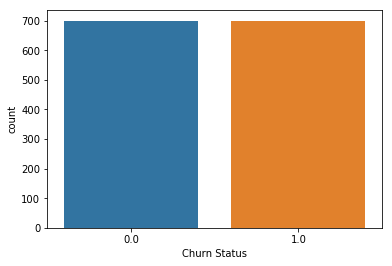

In [7]:
# Target variable is churn. What is the spread like?
#train_df['Churn Status'].value_counts().plot.bar()
sns.countplot(x='Churn Status', data=train_df)

In [8]:
train_df['Churn Status'].value_counts()

1.0    700
0.0    700
Name: Churn Status, dtype: int64

The above information imples that the baseline model should predict 0.5

# Feature Engineering
### Fix missing values

In [9]:
# more spend offnet
train_df['more_offnet'] = train_df['Total Onnet spend '] < train_df['Total Offnet spend']
test_df['more_offnet'] = test_df['Total Onnet spend '] < test_df['Total Offnet spend']

In [10]:
# fill missing values
train_df['Network type subscription in Month 1'] = train_df['Network type subscription in Month 1'].fillna('3G')
train_df['Network type subscription in Month 2'] = train_df['Network type subscription in Month 2'].fillna('3G')

In [11]:
train_df['Most Loved Competitor network in in Month 1'] = train_df['Most Loved Competitor network in in Month 1'].fillna('Uxaa')
train_df['Most Loved Competitor network in in Month 2'] = train_df['Most Loved Competitor network in in Month 2'].fillna('Uxaa')

In [12]:
# drop empty rows
train_df.dropna(inplace=True, how='any', axis=0)

### Scale numeric columns to between 0 and 1

In [13]:
columns = ['network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend ', 'Total Offnet spend', 'Total Call centre complaint calls']
train_df[columns] = minmax_scale(train_df[columns])
test_df[columns] = minmax_scale(test_df[columns])

In [14]:
churn_df = train_df[train_df['Churn Status'] == 1]
no_churn_df = train_df[train_df['Churn Status'] == 0]

### Split observations into churned and not_churned for a closer look

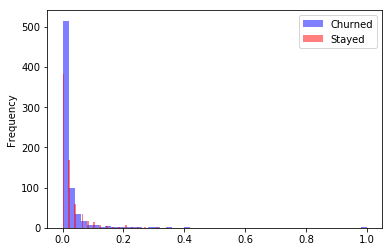

In [15]:
churn_df['Total Call centre complaint calls'].plot.hist(alpha=0.5,color='blue',bins=50)
no_churn_df['Total Call centre complaint calls'].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Churned','Stayed'])
plt.show()

In [16]:
train_df['Total Call centre complaint calls'].value_counts()

0.000000    897
0.020833    268
0.041667     92
0.062500     50
0.083333     24
0.104167     20
0.125000     10
0.145833      9
0.208333      7
0.166667      5
0.187500      4
0.250000      3
0.229167      3
0.270833      2
0.312500      2
1.000000      1
0.416667      1
0.354167      1
0.291667      1
Name: Total Call centre complaint calls, dtype: int64

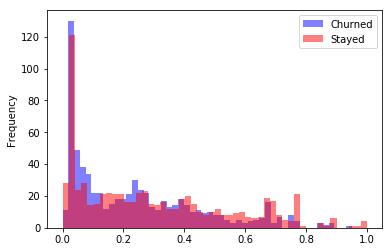

In [17]:
churn_df['network_age'].plot.hist(alpha=0.5,color='blue',bins=50)
no_churn_df['network_age'].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Churned','Stayed'])
plt.show()

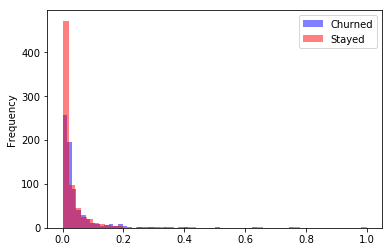

In [18]:
churn_df['Total SMS Spend'].plot.hist(alpha=0.5,color='blue',bins=50)
no_churn_df['Total SMS Spend'].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Churned','Stayed'])
plt.show()

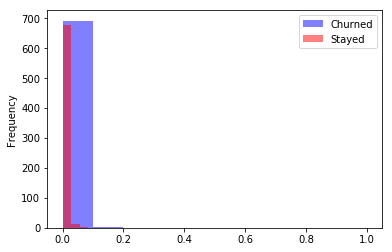

In [19]:
churn_df['Total Data Spend'].plot.hist(alpha=0.5,color='blue',bins=10)
no_churn_df['Total Data Spend'].plot.hist(alpha=0.5,color='red',bins=10)
plt.legend(['Churned','Stayed'])
plt.show()

In [20]:
# bin numerical variables
def create_bins(data):
    data['cat_network_age'] = pd.qcut(data['network_age'], q=4, labels=False)
    data['cat_spend'] = pd.qcut(data['Total Spend in Months 1 and 2 of 2017'], q=4, labels=False)
    data['cat_sms_spend'] = pd.qcut(data['Total SMS Spend'], q=4, labels=False)
    data['cat_data_spend'] = pd.qcut(data['Total Data Spend'], q=4, labels=False)
    data['cat_data_consumption'] = pd.qcut(data['Total Data Consumption'], q=4, labels=False)
    data['cat_unique_calls'] = pd.qcut(data['Total Unique Calls'], q=4, labels=False)
    data['cat_onnet_spend'] = pd.qcut(data['Total Onnet spend '], q=4, labels=False)
    data['cat_offnet_spend'] = pd.qcut(data['Total Offnet spend'], q=4, labels=False)
    data['cat_complaints'] = pd.qcut(data['Total Call centre complaint calls'], q=4, labels=False, duplicates='drop')
    
    # drop columns
    data.drop(inplace=True, columns=['network_age', 'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend ', 'Total Offnet spend', 'Total Call centre complaint calls'])
    return data

In [21]:
# convert categorical variables
def create_dummies(data):
    data_dum = pd.get_dummies(data, drop_first=True)
    return data_dum

In [22]:
binned_train_df = create_bins(train_df)
binned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, ADF0039 to ADF1982
Data columns (total 16 columns):
Customer tenure in month                       1400 non-null float64
Network type subscription in Month 1           1400 non-null object
Network type subscription in Month 2           1400 non-null object
Most Loved Competitor network in in Month 1    1400 non-null object
Most Loved Competitor network in in Month 2    1400 non-null object
Churn Status                                   1400 non-null float64
more_offnet                                    1400 non-null bool
cat_network_age                                1400 non-null int64
cat_spend                                      1400 non-null int64
cat_sms_spend                                  1400 non-null int64
cat_data_spend                                 1400 non-null int64
cat_data_consumption                           1400 non-null int64
cat_unique_calls                               1400 non-null int64
cat_onnet_s

In [23]:
cleaned_train_df = create_dummies(binned_train_df)
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, ADF0039 to ADF1982
Data columns (total 27 columns):
Customer tenure in month                                1400 non-null float64
Churn Status                                            1400 non-null float64
more_offnet                                             1400 non-null bool
cat_network_age                                         1400 non-null int64
cat_spend                                               1400 non-null int64
cat_sms_spend                                           1400 non-null int64
cat_data_spend                                          1400 non-null int64
cat_data_consumption                                    1400 non-null int64
cat_unique_calls                                        1400 non-null int64
cat_onnet_spend                                         1400 non-null int64
cat_offnet_spend                                        1400 non-null int64
cat_complaints                                    

## Network Age

In [24]:
#churn_df['network_age'].plot.hist()

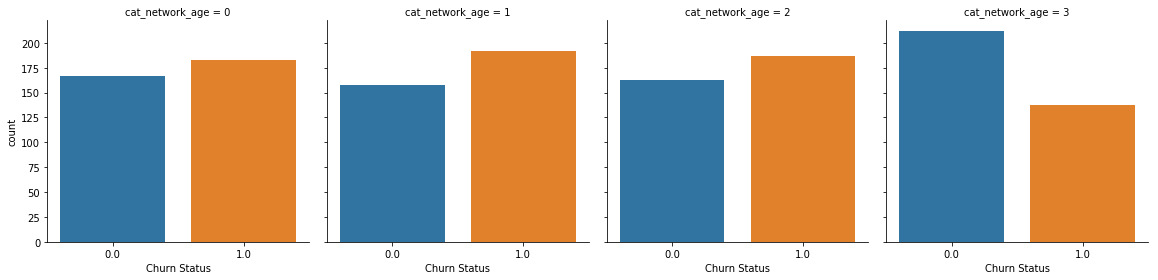

In [25]:
#no_churn_df['network_age'].plot.hist()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_network_age')

## Customer tenure in month

In [26]:
# churn_df['Customer tenure in month'].plot.hist()

In [27]:
# no_churn_df['Customer tenure in month'].plot.hist()
#sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_network_age')

## Total Spend in Months 1 and 2 of 2017

In [28]:
# churn_df['Total Spend in Months 1 and 2 of 2017'].plot.hist(bins=20)

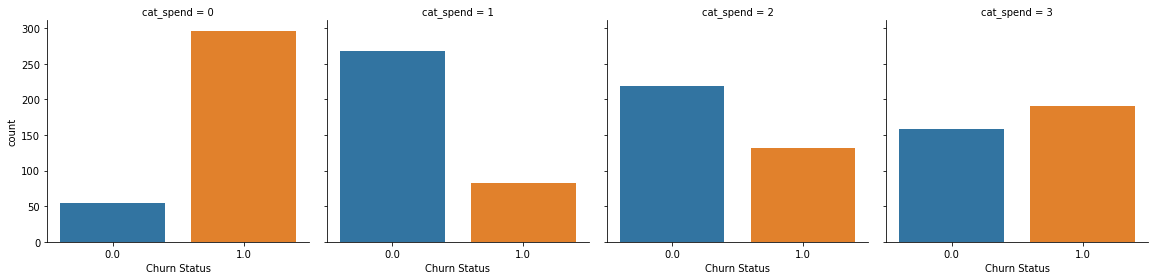

In [29]:
# no_churn_df['Total Spend in Months 1 and 2 of 2017'].plot.hist(bins=20)
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_spend')

## Total SMS Spend

In [30]:
#churn_df['Total SMS Spend'].plot.hist(bins=10)

In [31]:
#churn_df['Total SMS Spend'].describe()

In [32]:
#no_churn_df['Total SMS Spend'].plot.hist(bins=10)

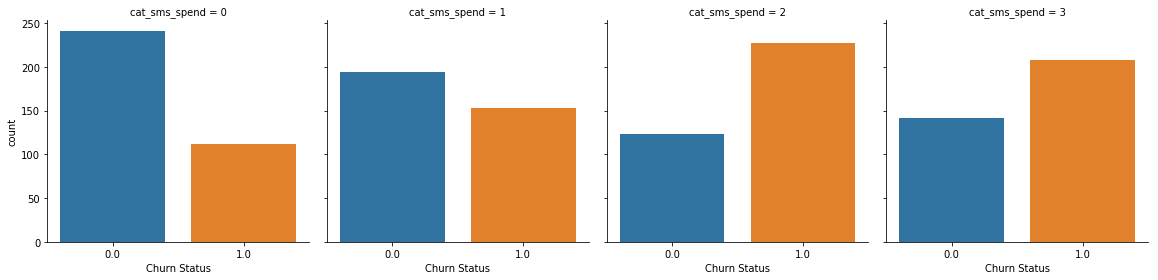

In [33]:
#no_churn_df['Total SMS Spend'].describe()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_sms_spend')

## Total Data Spend

In [34]:
#churn_df['Total Data Spend'].plot.hist()

In [35]:
#churn_df['Total Data Spend'].describe()

In [36]:
#no_churn_df['Total Data Spend'].plot.hist()

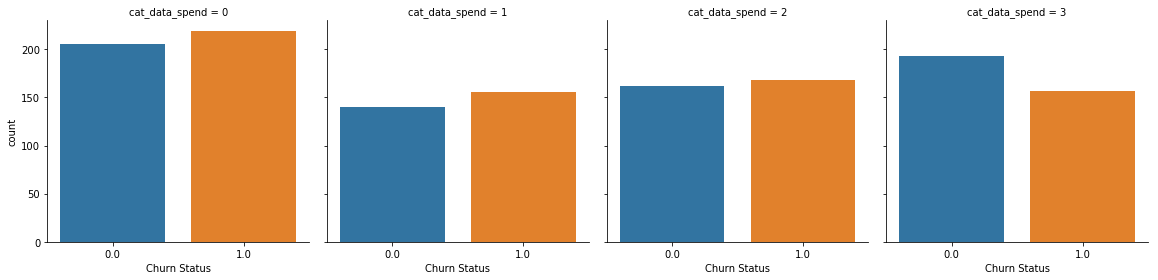

In [37]:
#no_churn_df['Total Data Spend'].describe()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_data_spend')

_there might be something to look at here_

## Total Data Consumption

In [38]:
#churn_df['Total Data Consumption'].plot.hist()

In [39]:
#churn_df['Total Data Consumption'].describe()

In [40]:
#no_churn_df['Total Data Consumption'].plot.hist()

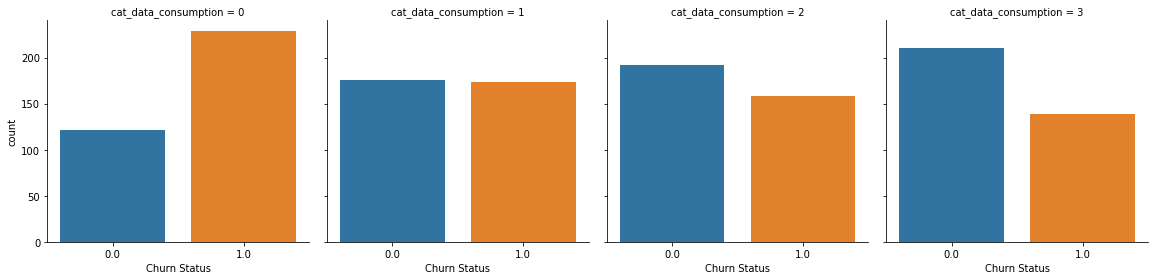

In [41]:
#no_churn_df['Total Data Consumption'].describe()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_data_consumption')

_there might also be something to look at here_

## Total Unique Calls

In [42]:
#churn_df['Total Unique Calls'].plot.hist(bins=20)

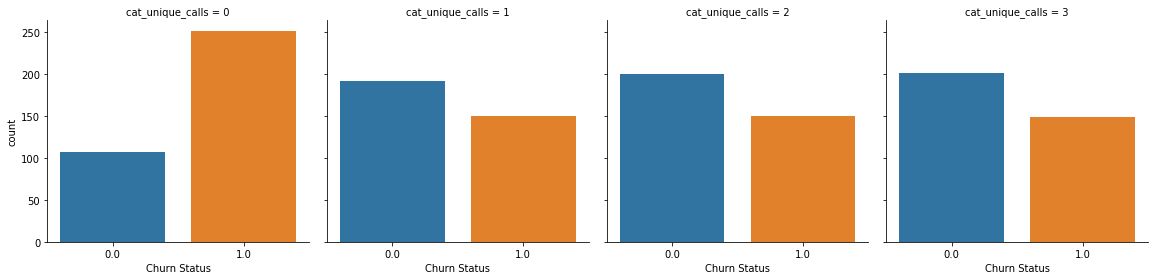

In [43]:
#no_churn_df['Total Unique Calls'].plot.hist(bins=20)
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_unique_calls')

_There might be something to look at here_

## More Offnet

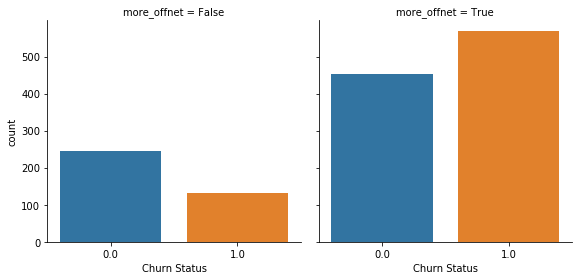

In [44]:
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='more_offnet')

## Total Onnet spend

In [45]:
#churn_df['Total Onnet spend '].plot.hist()

In [46]:
#churn_df['Total Onnet spend '].describe()

In [47]:
#no_churn_df['Total Onnet spend '].plot.hist()

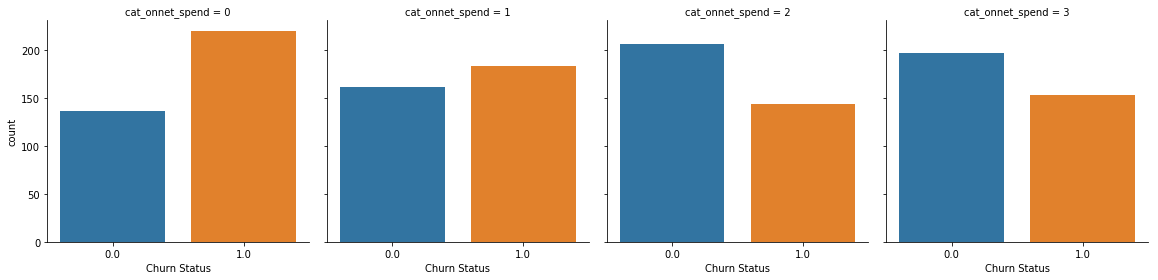

In [48]:
#no_churn_df['Total Onnet spend '].describe()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_onnet_spend')

## Total Offnet spend

In [49]:
#churn_df['Total Offnet spend'].plot.hist(bins=20)

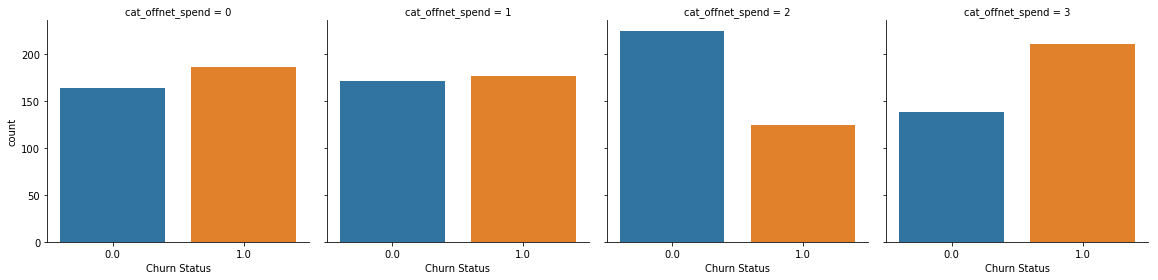

In [50]:
#no_churn_df['Total Offnet spend'].plot.hist(bins=20)
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_offnet_spend')

_something here_

## Total Call centre complaint calls

In [51]:
#churn_df['Total Call centre complaint calls'].plot.hist()

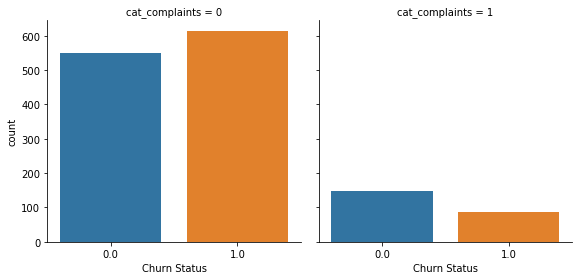

In [52]:
#no_churn_df['Total Call centre complaint calls'].plot.hist()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='cat_complaints')

_Definitely something here_

## Network type subscription in Month 1

In [53]:
#churn_df['Network type subscription in Month 1'].value_counts().plot.bar()

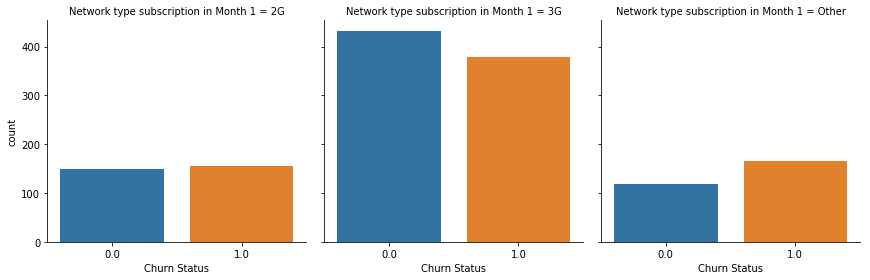

In [54]:
#no_churn_df['Network type subscription in Month 1'].value_counts().plot.bar()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='Network type subscription in Month 1')

## Network type subscription in Month 2

In [55]:
#churn_df['Network type subscription in Month 2'].value_counts().plot.bar()

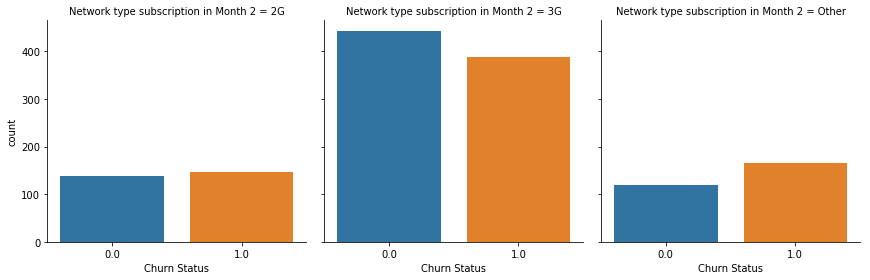

In [56]:
#no_churn_df['Network type subscription in Month 2'].value_counts().plot.bar()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='Network type subscription in Month 2')

## Most Loved Competitor network in in Month 1

In [57]:
#churn_df['Most Loved Competitor network in in Month 1'].value_counts().plot.bar()

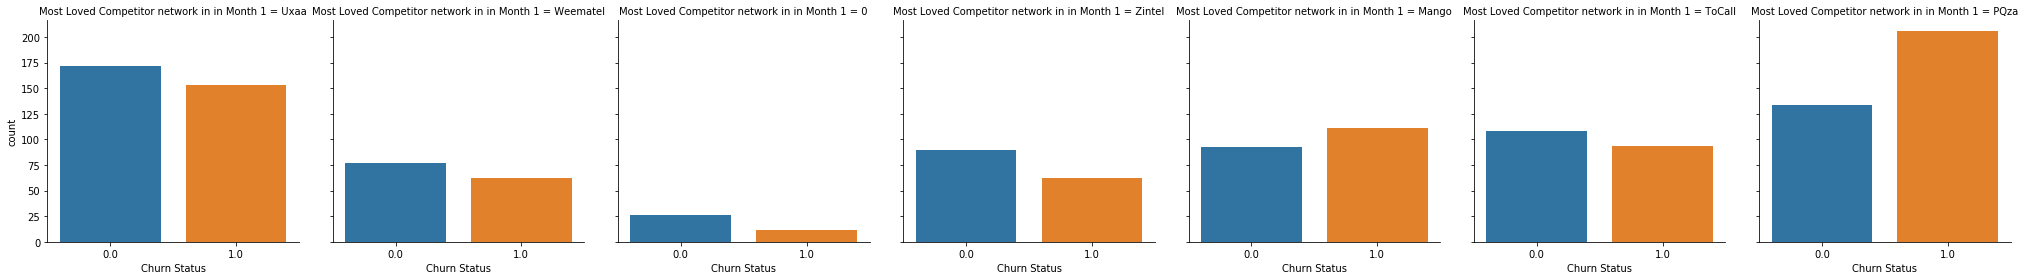

In [58]:
#no_churn_df['Most Loved Competitor network in in Month 1'].value_counts().plot.bar()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='Most Loved Competitor network in in Month 1')

## Most Loved Competitor network in in Month 2

In [59]:
#churn_df['Most Loved Competitor network in in Month 2'].value_counts().plot.bar()

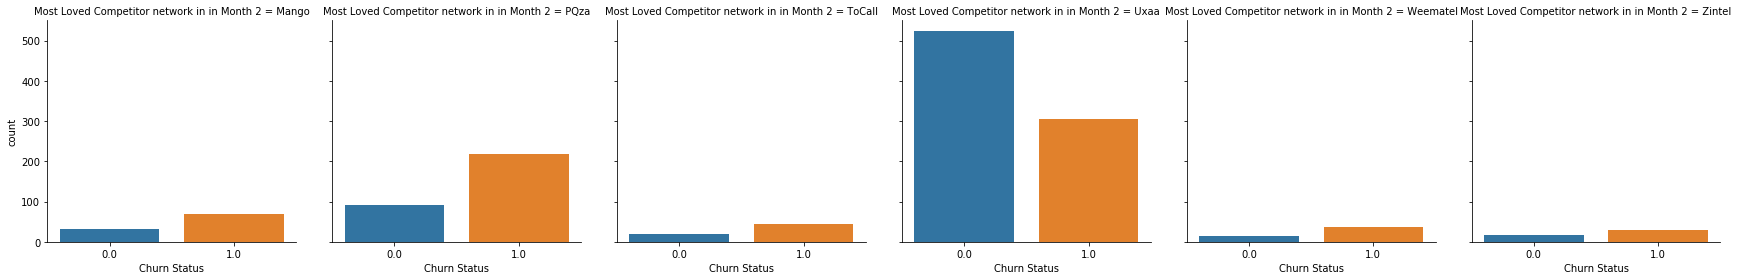

In [60]:
#no_churn_df['Most Loved Competitor network in in Month 2'].value_counts().plot.bar()
sns.factorplot(x='Churn Status', data=binned_train_df, kind='count', col='Most Loved Competitor network in in Month 2')

# Decision Tree Classifier

In [61]:
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, ADF0039 to ADF1982
Data columns (total 27 columns):
Customer tenure in month                                1400 non-null float64
Churn Status                                            1400 non-null float64
more_offnet                                             1400 non-null bool
cat_network_age                                         1400 non-null int64
cat_spend                                               1400 non-null int64
cat_sms_spend                                           1400 non-null int64
cat_data_spend                                          1400 non-null int64
cat_data_consumption                                    1400 non-null int64
cat_unique_calls                                        1400 non-null int64
cat_onnet_spend                                         1400 non-null int64
cat_offnet_spend                                        1400 non-null int64
cat_complaints                                    

In [62]:
input_df = cleaned_train_df.drop(['Churn Status', 'Customer tenure in month', 'cat_complaints'], axis=1)
output_df = cleaned_train_df['Churn Status']
X = input_df.values
y = output_df.values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=0)

In [63]:
# Setup the hyperparameter grid
dep = np.arange(1,40)
param_grid = {'max_depth': dep}

# Instantiate a decision tree classifier: clf
clf = tree.DecisionTreeClassifier()

# Instantiate the GridSearchCV object: clf_cv
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=10)

# Fit it to the data
clf_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 4}
Best score is 0.7164285714285714


### Visualize the model

In [64]:
clf_viz = clf_cv.best_estimator_ #tree.DecisionTreeClassifier(max_depth=max_depth)
clf_viz.fit(X,y)
viz = tree.export_graphviz(clf_viz, out_file=None, feature_names = input_df.columns)
graph = graphviz.Source(viz) 
graph.render("Churn Prediction Tree Visualization")

'Churn Prediction Tree Visualization.pdf'

In [65]:
binned_test_df = create_bins(test_df)
cleaned_test_df = create_dummies(binned_test_df)

In [66]:
test = cleaned_test_df.drop([ 'Customer tenure in month', 'cat_complaints'], axis=1).values
y_pred = clf_cv.predict(test)

In [67]:
cleaned_test_df['Churn'] = y_pred

In [68]:
cleaned_test_df['Churn Status'] = cleaned_test_df['Churn'].apply(lambda x: int(x))

In [69]:
cleaned_test_df[['Churn Status']].head()

,Churn Status
Customer ID,
ADF0001,0
ADF0002,1
ADF0003,0
ADF0004,1
ADF0005,1


In [70]:
cleaned_test_df[['Churn Status']].to_csv('predictions/dec_tree_feat_eng.csv', index=True)

Submission Accuracy: 0.58888

## Baseline Model

In [71]:
# create a baseline model
baseline_df = cleaned_test_df.drop(['Churn Status'], axis=1)
baseline_df['Churn Status'] = 0
baseline_df[['Churn Status']].to_csv('predictions/baseline.csv', index=True)

Submission Accuracy: 0.55555

# Ensemble

## Random Forest Classifier

In [79]:
hyperparameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': np.arange(1, 10),
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': np.arange(1,6),
    'min_samples_split': [3, 10],
    'n_estimators': [40, 50, 60]
}

rf = RandomForestClassifier(random_state = 1)
grid = GridSearchCV(rf, param_grid=hyperparameters, cv=10)
grid.fit(train_X, train_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50}
0.7741071428571429


In [76]:
clf_rf = grid.best_estimator_ #RandomForestClassifier(n_estimators= n_estimators, max_depth= max_depth)
clf_rf = clf_rf.fit(X, y)

In [77]:
cleaned_test_df = create_dummies(binned_test_df)
test = cleaned_test_df.drop([ 'Customer tenure in month', 'cat_complaints'], axis=1).values
y_pred = clf_rf.predict(test)

In [78]:
cleaned_test_df['Churn'] = y_pred
cleaned_test_df['Churn Status'] = cleaned_test_df['Churn'].apply(lambda x: int(x))
cleaned_test_df[['Churn Status']].to_csv('predictions/random_forest.csv', index=True)

* Submission Accuracy: 0.65000 w/ 10 Estimators
* Submission Accuracy: 0.70555 w/ 20 Estimators
* Submission Accuracy: 0.72222 w/ 40 Estimators
* Submission Accuracy: 0.71111 w/ 60 Estimators
* Submission Accuracy: 0.72777

## Extremely Randomized Trees Classifier

In [81]:
hyperparameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': np.arange(1, 10),
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': np.arange(1,6),
    'min_samples_split': [3, 10],
    'n_estimators': [40, 50]
}

et = ExtraTreesClassifier(random_state= 1)
grid = GridSearchCV(et, param_grid=hyperparameters, cv=10)
grid.fit(train_X, train_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 40}
0.7589285714285714


In [ ]:
clf_et = grid.best_estimator_
clf_et = clf_et.fit(X, y)

In [ ]:
cleaned_test_df = create_dummies(binned_test_df)
test = cleaned_test_df.drop([ 'Customer tenure in month', 'cat_complaints'], axis=1).values
y_pred = clf_et.predict(test)

In [ ]:
cleaned_test_df['Churn'] = y_pred
cleaned_test_df['Churn Status'] = cleaned_test_df['Churn'].apply(lambda x: int(x))
cleaned_test_df[['Churn Status']].to_csv('predictions/extra_trees.csv', index=True)

    * Submission Accuracy: 0.73333 w/ 40 estimators
    * Submission Accuracy: 0.71666

## AdaBoost Classifier

In [84]:
hyperparameters = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [90, 100, 110]
}

ada = AdaBoostClassifier()
grid = GridSearchCV(ada, param_grid=hyperparameters, cv=10)
grid.fit(train_X, train_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'algorithm': 'SAMME', 'n_estimators': 100}
0.7508928571428571


In [85]:
clf_ada = grid.best_estimator_
clf_ada = clf_ada.fit(X, y)

In [87]:
cleaned_test_df = create_dummies(binned_test_df)
test = cleaned_test_df.drop([ 'Customer tenure in month', 'cat_complaints'], axis=1).values
y_pred = clf_ada.predict(test)

In [88]:
cleaned_test_df['Churn'] = y_pred
cleaned_test_df['Churn Status'] = cleaned_test_df['Churn'].apply(lambda x: int(x))
cleaned_test_df[['Churn Status']].to_csv('predictions/adaboost.csv', index=True)

* Submission Accuracy: 0.73333 w/ 200 estimtors

## Gradient Boosting Classifier

In [92]:
hyperparameters = {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [50, 55, 60, 100],
    'max_depth': np.arange(1,6),
    'max_features': ['log2', 'sqrt']
}

gb = GradientBoostingClassifier()
grid = GridSearchCV(gb, param_grid=hyperparameters, cv=10)
grid.fit(train_X, train_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 55}
0.7705357142857143


In [93]:
clf_gb = grid.best_estimator_ #GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=max_depth, random_state=0)
clf_gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=55, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [95]:
cleaned_test_df = create_dummies(binned_test_df)
test = cleaned_test_df.drop([ 'Customer tenure in month', 'cat_complaints'], axis=1).values
y_pred = clf_gb.predict(test)

In [96]:
cleaned_test_df['Churn'] = y_pred
cleaned_test_df['Churn Status'] = cleaned_test_df['Churn'].apply(lambda x: int(x))
cleaned_test_df[['Churn Status']].to_csv('predictions/gboost.csv', index=True)

* Submission Accuracy: 0.73333 w/ 100 estimtors

## ML Ensemble

In [ ]:
seed = 0
# --- Build ---
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=accuracy_score, random_state=seed, verbose=2)

estimators = [GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0), AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth= 2), algorithm="SAMME", n_estimators= 50), RandomForestClassifier(n_estimators= 40, max_depth= 3, random_state=seed), SVC()]
# Build the first layer
#ensemble.add([GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0), AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth= 2), algorithm="SAMME", n_estimators= 50)])
ensemble.add(estimators)

# Build the second layer
#ensemble.add([RandomForestClassifier(n_estimators= 40, max_depth= 3, random_state=seed), SVC()])
#ensemble.add(estimators)

# Build the third layer
#ensemble.add([GaussianNB(), KNeighborsClassifier()])
#ensemble.add(estimators)

# Attach the final meta estimator
ensemble.add_meta(SVC())

# --- Use ---

# Fit ensemble
ensemble.fit(train_X, train_y)

In [ ]:
# Predict
preds = ensemble.predict(test_X)

In [ ]:
print("Fit data:\n%r" % ensemble.data)

In [ ]:
print("Prediction score: %.3f" % accuracy_score(preds, test_y))

In [ ]:
ensemble.fit(X, y)

In [ ]:
cleaned_test_df = create_dummies(binned_test_df)
test = cleaned_test_df.drop([ 'Customer tenure in month', 'cat_complaints'], axis=1).values
y_pred = ensemble.predict(test)

In [ ]:
cleaned_test_df['Churn'] = y_pred
cleaned_test_df['Churn Status'] = cleaned_test_df['Churn'].apply(lambda x: int(x))
cleaned_test_df[['Churn Status']].to_csv('predictions/ensemble.csv', index=True)

* Submission Accuracy: 0.63888

# Investigate Feature Importance

In [126]:
input_df = cleaned_train_df.drop(['Churn Status', 'Customer tenure in month', 'cat_complaints'], axis=1)
output_df = cleaned_train_df['Churn Status']

In [127]:
columns = ['more_offnet', 'cat_network_age', 'cat_spend', 'cat_sms_spend', 'cat_data_spend', 'cat_data_consumption', 'cat_unique_calls', 'cat_onnet_spend', 'cat_offnet_spend', '1_3G', '1_Other', '2_3G', '2_Other', '1_Mango', '1_PQza', '1_ToCall', '1_Uxaa', '1_Weematel', '1_Zintel', '2_PQza', '2_ToCall', '2_Uxaa', '2_Weematel', '2_Zintel']

In [128]:
input_df.columns = columns
X = input_df.values
y = output_df.values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=0)

In [129]:
input_df.columns

Index(['more_offnet', 'cat_network_age', 'cat_spend', 'cat_sms_spend',
       'cat_data_spend', 'cat_data_consumption', 'cat_unique_calls',
       'cat_onnet_spend', 'cat_offnet_spend', '1_3G', '1_Other', '2_3G',
       '2_Other', '1_Mango', '1_PQza', '1_ToCall', '1_Uxaa', '1_Weematel',
       '1_Zintel', '2_PQza', '2_ToCall', '2_Uxaa', '2_Weematel', '2_Zintel'],
      dtype='object')

### Feature Importances

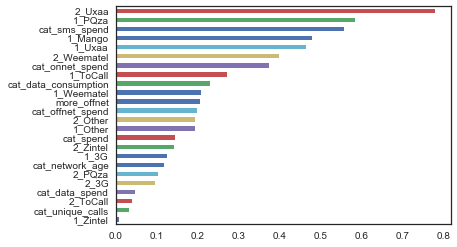

In [130]:
lr = LogisticRegression()
lr.fit(X, y)
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index=input_df.columns)
feature_importance.abs().sort_values().plot.barh()

In [131]:
chosen_columns = ['2_Uxaa', '1_PQza', 'cat_sms_spend', '1_Mango', '1_Uxaa', '2_Weematel', 'cat_offnet_spend', '1_ToCall', 'cat_data_consumption', '1_Weematel', 'more_offnet', 'cat_spend', 'cat_network_age', 'cat_data_spend', 'cat_unique_calls']

### Correlation

In [132]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

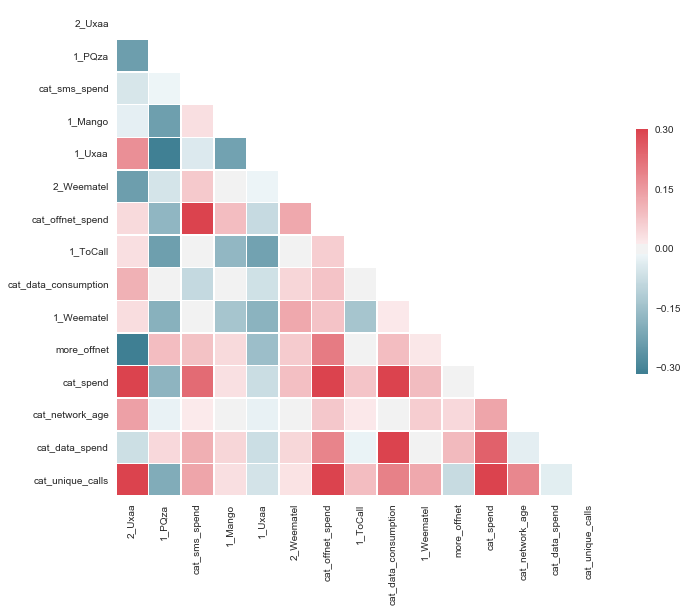

In [133]:
plot_correlation_heatmap(input_df[chosen_columns])

## Baseline Logistic Regression Model

In [134]:
input_df = cleaned_train_df.drop(['Churn Status', 'Customer tenure in month', 'cat_complaints'], axis=1)
input_df.columns = columns
input_df = input_df[chosen_columns]
output_df = cleaned_train_df['Churn Status']
X = input_df.values
y = output_df.values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=0)

In [135]:
lr = LogisticRegression()

scores = cross_val_score(lr, X, y, cv=10)
accuracy = scores.mean()

print("  Scores: ", scores)
print("Accuracy: ", accuracy)

  Scores:  [0.70714286 0.62142857 0.51428571 0.77857143 0.61428571 0.50714286
 0.77142857 0.74285714 0.54285714 0.7       ]
Accuracy:  0.65


## Recursive Feature Elimination using Cross-Validation

In [136]:
cleaned_train_df = create_dummies(binned_train_df)
cleaned_test_df = create_dummies(binned_test_df)
cleaned_test_df = cleaned_test_df.drop(['Customer tenure in month', 'cat_complaints'], axis=1)
cleaned_test_df.columns = columns
cleaned_test_df = cleaned_test_df[chosen_columns]
all_X = cleaned_train_df.drop(['Churn Status', 'Customer tenure in month', 'cat_complaints'], axis=1)
all_X.columns = columns
all_X = all_X[chosen_columns]
all_y = cleaned_train_df['Churn Status']
all_X.columns

Index(['2_Uxaa', '1_PQza', 'cat_sms_spend', '1_Mango', '1_Uxaa', '2_Weematel',
       'cat_offnet_spend', '1_ToCall', 'cat_data_consumption', '1_Weematel',
       'more_offnet', 'cat_spend', 'cat_network_age', 'cat_data_spend',
       'cat_unique_calls'],
      dtype='object')

In [137]:
lr = LogisticRegression()
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)

/Users/robert/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [138]:
optimized_columns = all_X.columns[selector.support_]
print(optimized_columns)

Index(['2_Uxaa', 'cat_sms_spend', 'more_offnet'], dtype='object')


In [140]:
all_X = all_X[optimized_columns]
#all_y = cleaned_train_df['Churn Status']

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(accuracy)

0.67


### Train Random Forest on optimized columns

In [125]:
hyperparameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': np.arange(1, 10),
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': np.arange(1,6),
    'min_samples_split': [3, 10],
    'n_estimators': [40, 50, 60]
}

rf = RandomForestClassifier(random_state = 1)
grid = GridSearchCV(rf, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
0.6771428571428572
